In [13]:
import numpy as np 
import pandas as pd

standard=pd.read_excel('standard.xlsx',header=1)
standard=standard.rename(columns={"대기온도" : "외부 대기온도", "대기온도.1" : "최대 대기온도", "대기온도.2" : "최소 대기온도",
                   "온도" : "이슬점 온도", "온도1" : "노면온도1", "온도2" : "노면온도2", "요약" : "시편상태 요약"})
standard=standard.iloc[:,[3,6,7,8,18,35,43,44,45]]

standard = standard.replace("---", np.nan)
standard=standard.replace("확인불가",np.nan)
standard=standard.dropna(axis=0)

standard.reset_index(drop=True)

temp=standard.drop(labels=['날씨','시편상태'],axis=1)
temp.replace('결빙',1,inplace=True)
temp.replace('비결빙',0,inplace=True)
X=temp.iloc[:,:-1];y=temp.iloc[:,-1]

freeze_input=X.to_numpy()
freeze_target=y.to_numpy()

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target=train_test_split(
    freeze_input,freeze_target,stratify=freeze_target,random_state=42)

from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
ss.fit(train_input)
train_scaled=ss.transform(train_input)
test_scaled=ss.transform(test_input)

KeyboardInterrupt: 

In [3]:
import tensorflow as tf
from tensorflow import keras
model=keras.Sequential()
model.add(keras.layers.Dense(128,activation='relu',input_shape=(6,)))
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics='accuracy')
model.summary()

history=model.fit(train_scaled,train_target,epochs=20)

from sklearn.metrics import roc_curve

def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               896       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 9,217
Trainable params: 9,217
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
439/439 [==============================] - 1s 704us/step - loss: 0.0861 - accuracy: 0.9772
Epoch 2/20
439/439 [==============================] - 0s 731us/step - loss: 0.0262 - accuracy: 0.9902
Epoch 3/20
439/439 [============================

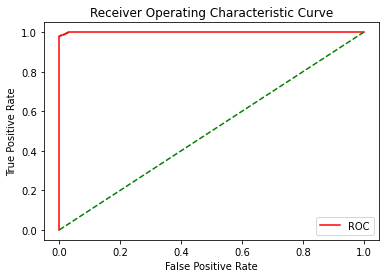

In [4]:
import matplotlib.pyplot as plt

prob = model.predict(test_scaled)
prob = prob[:]
fper, tper, thresholds = roc_curve(test_target, prob)
plot_roc_curve(fper, tper)

In [12]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(test_target, result))
print(classification_report(test_target, result))

[[ 333    9]
 [  13 4319]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       342
           1       1.00      1.00      1.00      4332

    accuracy                           1.00      4674
   macro avg       0.98      0.99      0.98      4674
weighted avg       1.00      1.00      1.00      4674



In [7]:
result=model.predict_classes(test_scaled)
print(prob.shape,result.shape)

(4674, 1) (4674, 1)


In [10]:
print(prob[5],result[5])

[0.00379378] [0]
